In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
ticker = "AAPL"   # Apple
# ticker = "TSLA" # Tesla

In [4]:
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data.head()

/tmp/ipython-input-873255131.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400520,72.460784,71.156682,71.409785,135480400
2020-01-03,71.696655,72.455974,71.472477,71.629160,146322800
2020-01-06,72.267929,72.306499,70.568503,70.819201,118387200
2020-01-07,71.928062,72.533103,71.708703,72.277586,108872000
2020-01-08,73.085106,73.386423,71.631552,71.631552,132079200


In [5]:
data["Target_Close_Next_Day"] = data["Close"].shift(-1)
data = data.dropna()
data.head()

Price,Close,High,Low,Open,Volume,Target_Close_Next_Day
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,72.400520,72.460784,71.156682,71.409785,135480400,71.696655
2020-01-03,71.696655,72.455974,71.472477,71.629160,146322800,72.267929
2020-01-06,72.267929,72.306499,70.568503,70.819201,118387200,71.928062
2020-01-07,71.928062,72.533103,71.708703,72.277586,108872000,73.085106
2020-01-08,73.085106,73.386423,71.631552,71.631552,132079200,74.637497


In [6]:
X = data[["Open", "High", "Low", "Volume"]]
y = data["Target_Close_Next_Day"]

In [7]:
split_index = int(len(data) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [9]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [10]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Results:")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R2  :", r2)
    print("-" * 30)

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)

Linear Regression Results:
MAE : 2.3340629688449464
RMSE: 3.101640156386668
R2  : 0.9852342813531935
------------------------------
Random Forest Results:
MAE : 19.223130095345635
RMSE: 25.934366056231386
R2  : -0.03234067773954119
------------------------------


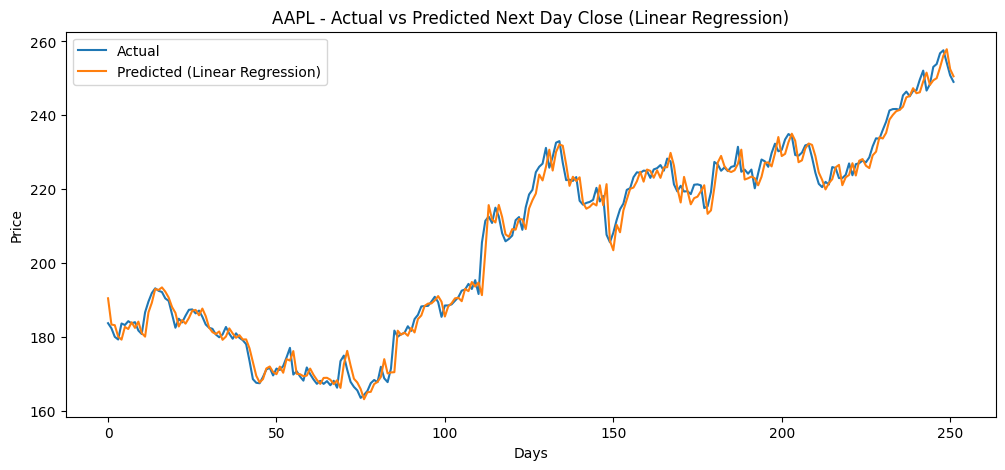

In [11]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(lr_pred, label="Predicted (Linear Regression)")
plt.title(f"{ticker} - Actual vs Predicted Next Day Close (Linear Regression)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

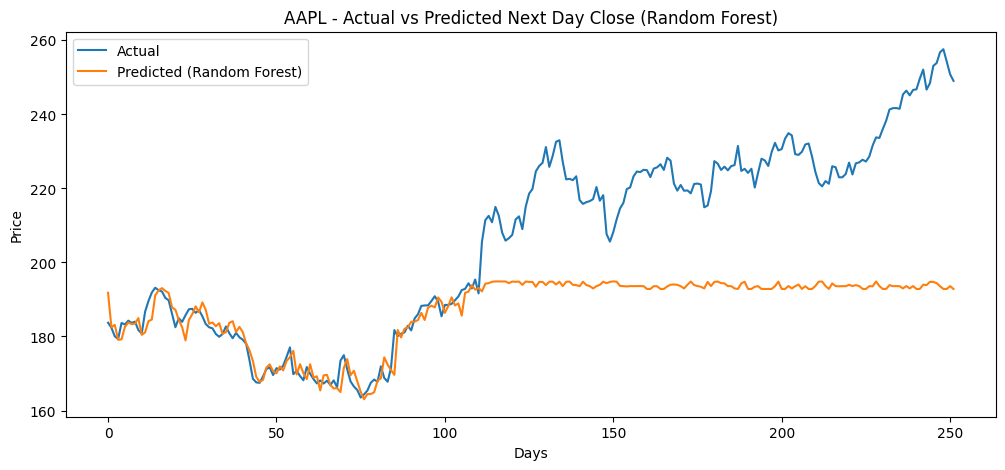

In [12]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(rf_pred, label="Predicted (Random Forest)")
plt.title(f"{ticker} - Actual vs Predicted Next Day Close (Random Forest)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [13]:
latest_features = X.iloc[-1:].copy()
tomorrow_pred_lr = lr_model.predict(latest_features)[0]
tomorrow_pred_rf = rf_model.predict(latest_features)[0]

print("Predicted Next Day Close (Linear Regression):", tomorrow_pred_lr)
print("Predicted Next Day Close (Random Forest):", tomorrow_pred_rf)

Predicted Next Day Close (Linear Regression): 250.56927489542392
Predicted Next Day Close (Random Forest): 192.8315365600586
